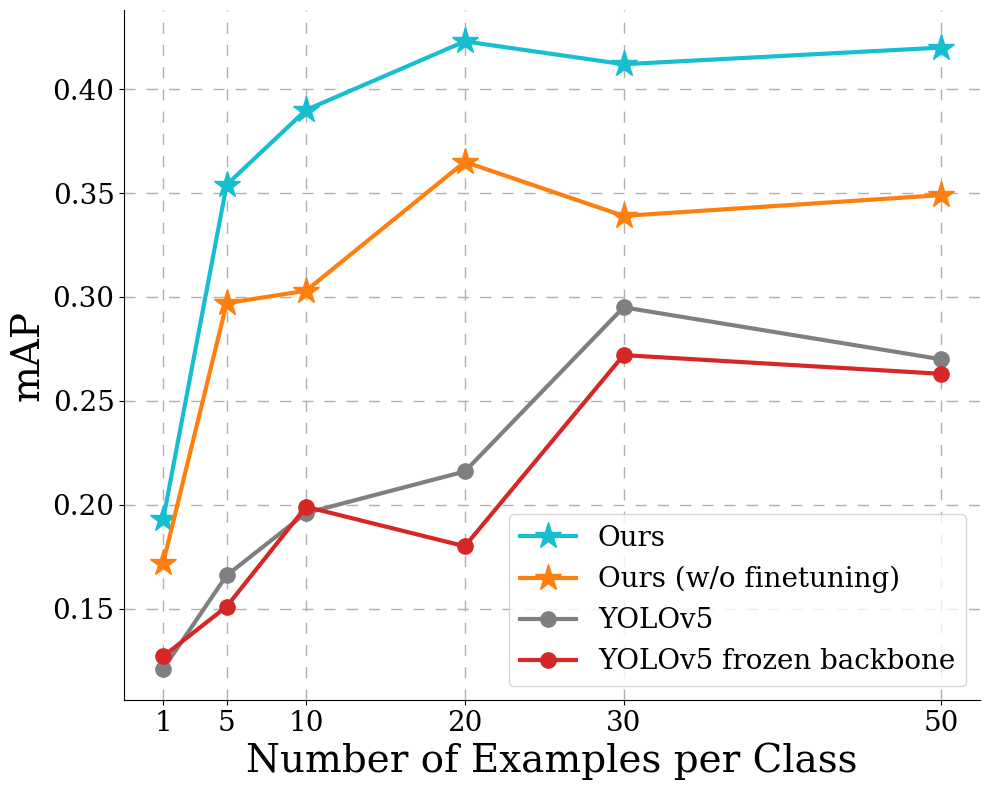

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font family to serif
mpl.rcParams['font.family'] = 'serif'

simd_emb_map50_base = [0.200, 0.603, 0.276, 0.411, 0.388, 0.49275]  # mAP scores for base classes
simd_emb_map50_rare_dino = [0.193, 0.354, 0.390, 0.423, 0.412, 0.420]  # mAP scores for rare classes
simd_emb_map50_rare_yolo_frozen = [0.127, 0.151, 0.199, 0.180, 0.272, 0.263]
simd_emb_map50_rare_yolo = [0.121, 0.166, 0.196, 0.216, 0.295, 0.270]
simd_emb_map50_rare_dino_avg = [0.172, 0.297, 0.303, 0.365, 0.339, 0.349]

# Number of examples per class
N = [1, 5, 10, 20, 30, 50]

# Plotting the results
plt.figure(figsize=(10, 8))

plt.plot(N, simd_emb_map50_rare_dino, marker='*', markersize=20, color='tab:cyan', label='Ours', linewidth=3)
plt.plot(N, simd_emb_map50_rare_dino_avg, marker='*', markersize=20, color='tab:orange', label='Ours (w/o finetuning)', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo, marker='o', markersize=11, color='tab:gray', label='YOLOv5', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo_frozen, marker='o', markersize=11, color='tab:red', label='YOLOv5 frozen backbone', linewidth=3)

#plt.title('Performance on novel classes vs Number of Examples', fontsize=22)
plt.xlabel('Number of Examples per Class', fontsize=28)
plt.ylabel('mAP', fontsize=28)
plt.xticks(N, fontsize=20)  # Set x-axis ticks to the values in N with fontsize 12
plt.yticks(fontsize=20)  # Set y-axis ticks with fontsize 12
plt.grid(True, linestyle='--', linewidth=1, dashes=(8, 8))  # Adjust grid lines
plt.gca().spines['top'].set_visible(False)  # Remove upper line
plt.gca().spines['right'].set_visible(False)  # Remove right line
plt.legend(fontsize=20)
plt.tight_layout()

#plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v1.png', transparent=True)
plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v1.pdf', format='pdf')
plt.show()


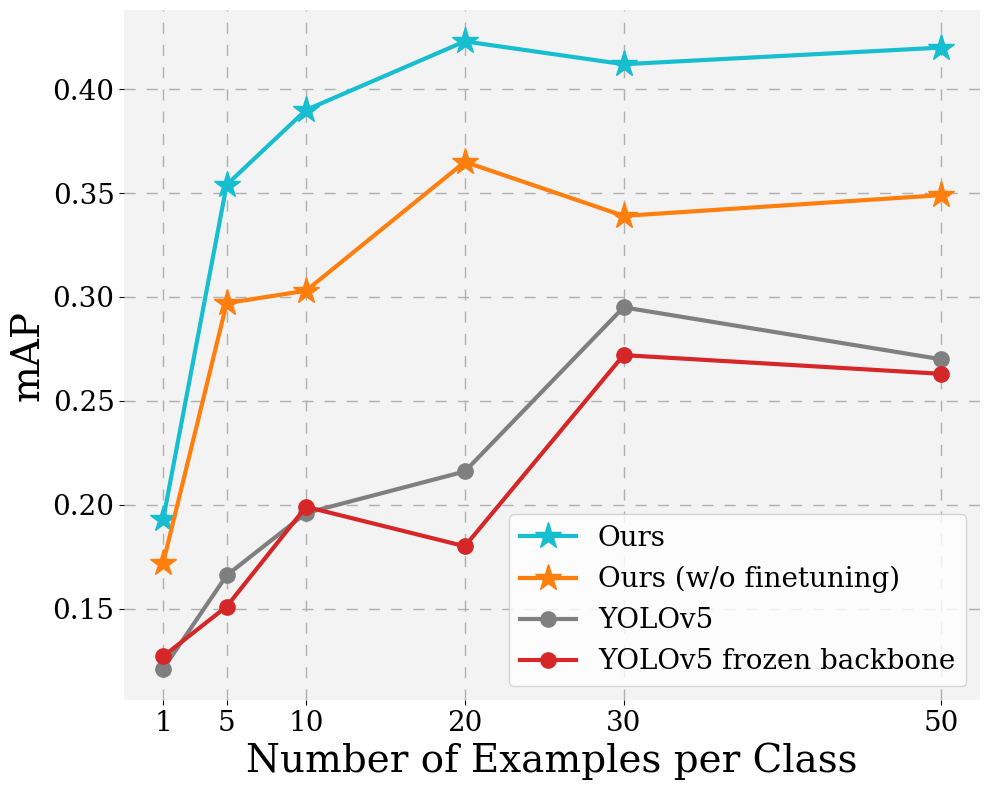

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font family to serif
mpl.rcParams['font.family'] = 'serif'

simd_emb_map50_base = [0.200, 0.603, 0.276, 0.411, 0.388, 0.49275]  # mAP scores for base classes
simd_emb_map50_rare_dino = [0.193, 0.354, 0.390, 0.423, 0.412, 0.420]  # mAP scores for rare classes
simd_emb_map50_rare_yolo_frozen = [0.127, 0.151, 0.199, 0.180, 0.272, 0.263]
simd_emb_map50_rare_yolo = [0.121, 0.166, 0.196, 0.216, 0.295, 0.270]
simd_emb_map50_rare_dino_avg = [0.172, 0.297, 0.303, 0.365, 0.339, 0.349]

# Number of examples per class
N = [1, 5, 10, 20, 30, 50]

# Plotting the results
plt.figure(figsize=(10, 8))

# Set background color with transparency
plt.gca().set_facecolor((0.9, 0.9, 0.9, 0.45))  # light grey with transparency

plt.plot(N, simd_emb_map50_rare_dino, marker='*', markersize=20, color='tab:cyan', label='Ours', linewidth=3)
plt.plot(N, simd_emb_map50_rare_dino_avg, marker='*', markersize=20, color='tab:orange', label='Ours (w/o finetuning)', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo, marker='o', markersize=11, color='tab:gray', label='YOLOv5', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo_frozen, marker='o', markersize=11, color='tab:red', label='YOLOv5 frozen backbone', linewidth=3)

#plt.title('Performance on novel classes vs Number of Examples', fontsize=22)
plt.xlabel('Number of Examples per Class', fontsize=28)
plt.ylabel('mAP', fontsize=28)
plt.xticks(N, fontsize=20)  # Set x-axis ticks to the values in N with fontsize 12
plt.yticks(fontsize=20)  # Set y-axis ticks with fontsize 12
plt.grid(True, linestyle='--', linewidth=1, dashes=(8, 8))  # Adjust grid lines
plt.gca().spines['top'].set_visible(False)  # Remove upper line
plt.gca().spines['right'].set_visible(False)  # Remove right line
plt.gca().spines['left'].set_visible(False)  # Remove right line
plt.gca().spines['bottom'].set_visible(False)  # Remove right line
plt.legend(fontsize=20)
plt.tight_layout()

#plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v1.png', transparent=True)
plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v2.pdf', format='pdf', transparent=False)  # Save with transparency
plt.show()


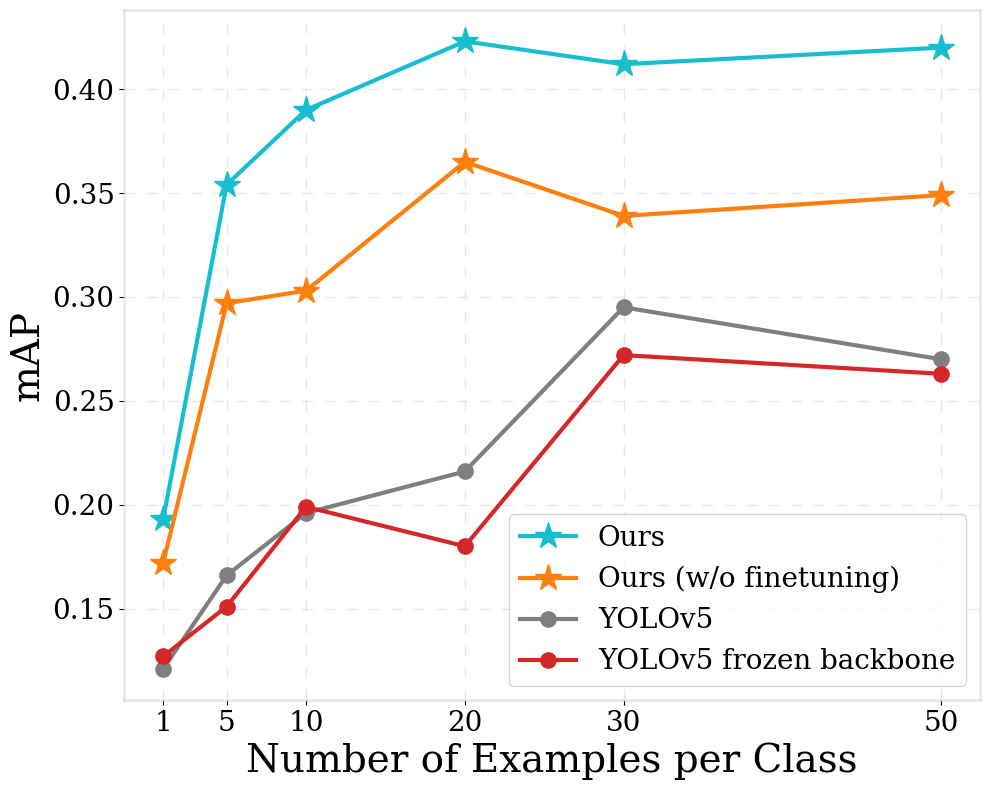

In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font family to serif
mpl.rcParams['font.family'] = 'serif'

simd_emb_map50_base = [0.200, 0.603, 0.276, 0.411, 0.388, 0.49275]  # mAP scores for base classes
simd_emb_map50_rare_dino = [0.193, 0.354, 0.390, 0.423, 0.412, 0.420]  # mAP scores for rare classes
simd_emb_map50_rare_yolo_frozen = [0.127, 0.151, 0.199, 0.180, 0.272, 0.263]
simd_emb_map50_rare_yolo = [0.121, 0.166, 0.196, 0.216, 0.295, 0.270]
simd_emb_map50_rare_dino_avg = [0.172, 0.297, 0.303, 0.365, 0.339, 0.349]

# Number of examples per class
N = [1, 5, 10, 20, 30, 50]

# Plotting the results
plt.figure(figsize=(10, 8))

plt.plot(N, simd_emb_map50_rare_dino, marker='*', markersize=20, color='tab:cyan', label='Ours', linewidth=3)
plt.plot(N, simd_emb_map50_rare_dino_avg, marker='*', markersize=20, color='tab:orange', label='Ours (w/o finetuning)', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo, marker='o', markersize=11, color='tab:gray', label='YOLOv5', linewidth=3)
plt.plot(N, simd_emb_map50_rare_yolo_frozen, marker='o', markersize=11, color='tab:red', label='YOLOv5 frozen backbone', linewidth=3)

#plt.title('Performance on novel classes vs Number of Examples', fontsize=22)
plt.xlabel('Number of Examples per Class', fontsize=28)
plt.ylabel('mAP', fontsize=28)
plt.xticks(N, fontsize=20)  # Set x-axis ticks to the values in N with fontsize 12
plt.yticks(fontsize=20)  # Set y-axis ticks with fontsize 12

# Adjust grid lines color and transparency
#plt.grid(True, linestyle='-', linewidth=2, color='lightgrey', alpha=0.5)
plt.grid(True, linestyle='--', linewidth=1, color='lightgrey', dashes=(8, 8), alpha=0.5)  # Adjust grid lines

# Adjust spines color and transparency
plt.gca().spines['top'].set_color('lightgrey')
plt.gca().spines['right'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['bottom'].set_color('lightgrey')

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

plt.gca().spines['top'].set_alpha(0.5)
plt.gca().spines['right'].set_alpha(0.5)
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

plt.legend(fontsize=20)
plt.tight_layout()

#plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v1.png', transparent=True)
plt.savefig('/mnt/ddisk/boux/code/ovdsat/run/plots/teaser_plot_v3.pdf', format='pdf')
plt.show()


In [1]:
# Imports
import torch
#from torch.utils.data import DataLoader
from datasets.dataset import DINODataset
from models.detector import OVDDetector

/mnt/ddisk/boux/miniconda3/envs/dino_detector/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dir = '/mnt/ddisk/boux/code/data/simd/validation'
annotations_file = '/mnt/ddisk/boux/code/data/simd/val_coco.json'
prototypes_path = '/mnt/ddisk/boux/code/ovdsat/prototypes/simd_prototypes.pth'
bg_prototypes_path = '/mnt/ddisk/boux/code/ovdsat/prototypes/simd_bg_prototypes.pth'
target_size = (602, 602)
batch_size = 1 
num_workers = 8 
iou_thr = 0.3
conf_thres = 1
scale_factor = [2]
backbone_type = 'clip-14'

In [3]:
dataset = DINODataset(root_dir, annotations_file, torch.load(prototypes_path)['label_names'], augment=True, target_size=target_size, real_indices=False)
dataset_no_aug = DINODataset(root_dir, annotations_file, torch.load(prototypes_path)['label_names'], augment=False, target_size=target_size, real_indices=False)

In [4]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_image_with_boxes(image_tensor, bounding_boxes):
    # Convert torch tensor to numpy array
    image_np = image_tensor.permute(1, 2, 0).cpu().numpy()

    # Create figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)

    # Plot bounding boxes
    for box in bounding_boxes:
        xmin, ymin, w, h = box
        xmax, ymax = xmin + w, ymin + h
        rect = patches.Rectangle((xmin, ymin), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show plot
    plt.axis('off')
    plt.show()


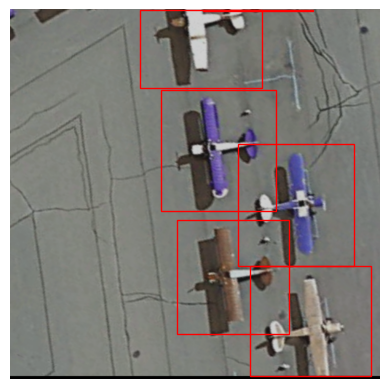

In [40]:
image, boxes, gt, metadata = dataset[19]
boxes = boxes[boxes.sum(-1) > 0]
image /= 255

# Plot the image with bounding boxes
plot_image_with_boxes(image, boxes)

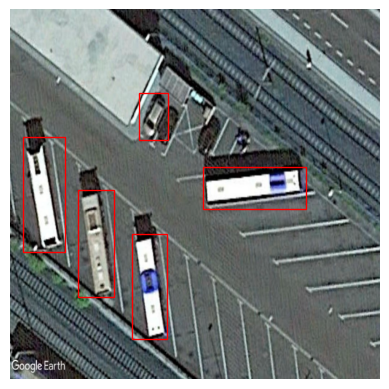

In [13]:
image, boxes, gt, metadata = dataset_no_aug[4]
boxes = boxes[boxes.sum(-1) > 0]
image /= 255

# Plot the image with bounding boxes
plot_image_with_boxes(image, boxes)

In [ ]:
P = [0.306, 

In [82]:
# F1 = 2 * (Pr * Re) / (Pr + Re)
Pr = 0.3849     
Re = 0.4013
F1 = 2 * (Pr * Re) / (Pr + Re)
F1

0.39292894937674894

In [102]:
0.870 ** 2

0.7569